<a href="https://colab.research.google.com/github/alibouch/TensorFlow_FSA_21-22/blob/main/Atelier_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atelier 4 : L'API tf.data

---



## Docummentation

[tf.data Module](https://www.tensorflow.org/api_docs/python/tf/data)

[tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

[tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)

[Better performance with the tf.data API](https://www.tensorflow.org/guide/data_performance)

[Analyze tf.data performance with the TF Profiler](https://www.tensorflow.org/guide/data_performance_analysis)

---



In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
np.random.seed(42)

## Introduction à tf.data

Toute l’API Data s’articule autour du concept de *dataset*. Il s’agit de la représentation d’une suite d’éléments de données. voici une brève description des méthodes de la classe `Dataset` :

In [ ]:
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● bucket_by_sequence_length()A transformation that buckets elements in a `Dataset` by length.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● choose_from_datasets()Creates a dataset that deterministically chooses elements from `datasets`.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Create

La fonction `from_tensor_slices()` prend un tenseur et crée un `tf.data.Dataset` dont les éléments sont tous des tranches de X (sur la première dimension) :

In [ ]:
X = tf.range(10)
dataset = 
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

Nous  obtenons le même dataset avec `tf.data.Dataset.range()` :

In [ ]:
dataset = tf.data.Dataset.range(10)

In [ ]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


Le module `tf.data.TextLineDataset` permet de charger du texte à partir de fichiers texte et de créer un dataset où chaque ligne des fichiers devient un élément de ce dataset.

Commençons par créer un fichier texte

In [ ]:
%%writefile sample1.txt
0,male,22.0,1,0,7.25,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
1,female,26.0,0,0,7.925,Third,unknown,Southampton,y
1,female,35.0,1,0,53.1,First,C,Southampton,n
0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
0,male,2.0,3,1,21.075,Third,unknown,Southampton,n

Overwriting sample1.txt


Création d'un tenseur avec le fichier texte :

In [ ]:
filenames = tf.constant(value = ["sample1.txt"], dtype = tf.string)

Créations du dataset à partir du fichier texte :

In [ ]:
dat1 = 
for line in dat1:
  print(line)

tf.Tensor(b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n', shape=(), dtype=string)
tf.Tensor(b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n', shape=(), dtype=string)
tf.Tensor(b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y', shape=(), dtype=string)
tf.Tensor(b'1,female,35.0,1,0,53.1,First,C,Southampton,n', shape=(), dtype=string)
tf.Tensor(b'0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y', shape=(), dtype=string)
tf.Tensor(b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n', shape=(), dtype=string)


##Transformations

Enchainez les transformations suivantes sur le dataset :


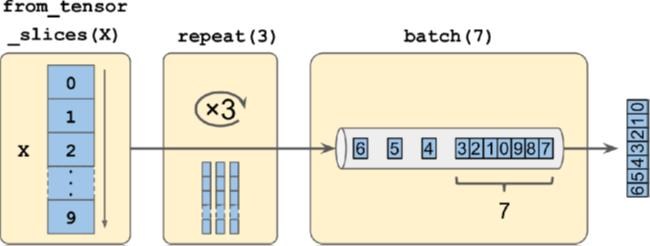 

In [ ]:
dataset = 
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


Transformez les éléments du dataset en appelant la méthode `map()`. Les valeurs des éléments du nouveau dataset sont obtenus en multipliant les valeurs de l'ancien par deux :

In [ ]:
dataset = 

In [ ]:
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


Transformez le dataset de telle façon à ce que chaque élément du nouveau dataset sera un tenseur d’un seul entier au lieu d’un lot de sept entiers :

In [ ]:
dataset = 
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, sh

Filtrez le dataset afin de ne garder que les éléments inférieurs à 10 :

In [ ]:
dataset =   

Examinez 3 éléments du dataset. Utiliszez la méthode `take()` :

In [ ]:
for item in              :
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


##Mélanger les données

In [ ]:
dataset = tf.data.Dataset.range(10).repeat(3)

Mélangez le dataset avec un tampon (buffer) de taille 5 et un germe aléatoire (seed) de 42, et regroupez ses éléments en lots (batch) de taille 7. Utilisez la méthode `suffle()` :

In [ ]:
dataset = 
for item in dataset:
    print(item)

tf.Tensor([0 3 4 2 1 5 8], shape=(7,), dtype=int64)
tf.Tensor([6 9 7 2 3 1 4], shape=(7,), dtype=int64)
tf.Tensor([6 0 7 9 0 1 2], shape=(7,), dtype=int64)
tf.Tensor([8 4 5 5 3 8 9], shape=(7,), dtype=int64)
tf.Tensor([7 6], shape=(2,), dtype=int64)


## Découper le dataset California Housing en de nombreux fichiers CSV

Commençons par charger et préparer le dataset California Housing. Nous le chargeons d'abord, puis le divisons en un dataset d'entraînement, un dataset de validation et un dataset de test, et enfin nous le normalisons :

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

Pour un dataset très volumineux qui ne tient pas en mémoire, nous le découpons généralement en plusieurs fichiers, puis nous demandons à TensorFlow de lire ces fichiers en parallèle. 

Pour illustrer cela, commençons par définir une fonction qui permet de découpez le dataset California Housing en plusieurs fichiers CSV et qui retourne la liste des chemins des fichiers crées :

In [ ]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [ ]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

Utilisez la fonction précédente pour découpez le dataset d'entraînement en 20 fichiers CSV, le dataset de validation et le dataset de test en 10 fichiers CSV chacun :

In [ ]:
train_filepaths = 
valid_filepaths = 
test_filepaths = 

Jetons un coup d'oeil aux premières lignes de l'un de ces fichiers CSV :

In [ ]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


Ou en mode texte:

In [ ]:
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [ ]:
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

## construire un pipeline d’entrée

Créez un dataset qui ne contient que les chemins de fichiers d'entraînement. Utilisez la méthode `list_files()` avec un germe aléatoire (seed) de 42. Cette méthode retourne un dataset qui mélange les chemins de fichiers :

In [ ]:
filepath_dataset = 

In [ ]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Ten

Nous appelons ensuite la méthode `interleave()` pour effectuer la lecture à
partir de cinq fichiers à la fois et entrelacer leurs lignes en sautant la ligne d’en-tête de chaque fichier avec la méthode `skip()` :

In [ ]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

In [ ]:
for line in dataset.take(5):
    print(line.numpy())

b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0'
b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67'
b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205'
b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215'


Comme vous pouvez le constatez, il s’agit de chaînes d’octets (b*yte strings*). Nous devons donc les analyser et redimensionner les
données.

In [ ]:
n_inputs = 8 

@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

Parcourons ce code :

*   La fonction `preprocess()` prend une ligne CSV et commence son analyse.
Pour cela, elle se sert de la fonction `tf.io.decode_csv()`, qui attend
deux arguments : le premier est la ligne à analyser, le second est un tableau contenant la valeur par défaut de chaque colonne du fichier CSV. Ce tableau indique à TensorFlow non seulement la valeur par défaut de chaque colonne, mais également le nombre de colonnes et leur type. Dans cet exemple, nous précisons que toutes les colonnes de caractéristiques sont des nombres à virgule flottante et que les valeurs manquantes doivent être fixées à 0. Toutefois, pour la dernière colonne (la cible), nous fournissons un tableau vide de type `tf.float32` comme valeur par défaut. Il indique à TensorFlow que cette colonne contient des nombres à virgule flottante, sans aucune valeur par défaut. Une exception sera donc lancée en cas de valeur manquante.
*   La fonction `decode_csv()` retourne une liste de tenseurs de type scalaire (un par colonne), alors que nous devons retourner des tableaux de tenseursvà une dimension. Nous appelons donc `tf.stack()` sur tous les tenseurs à l’exception du dernier (la cible) : cette opération empile les tenseurs dans un tableau à une dimension. Nous faisons ensuite de même pour la valeur cible (elle devient un tableau de tenseurs à une dimension avec une seule valeur à la place d’un tenseur de type scalaire).
*   Enfin, nous redimensionnons les caractéristiques d’entrée en leur soustrayant les moyennes des caractéristiques et en divisant le résultat par leur écart-type. Nous retournons un tuple qui contient les caractéristiques mises à l’échelle et la cible.





Testons cette fonction de prétraitement :

In [ ]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

Le résultat semble bon ! Nous pouvons à présent l’appliquer au dataset. 
Pour cela, nous allons définir une fonction qui va créer et retourner un dataset qui chargera efficacement le jeu de données California Housing à partir de plusieurs fichiers CSV, le prétraitera, le mélangera, le répétera éventuellement et le divisera en lots (voir la figure 5.2) :

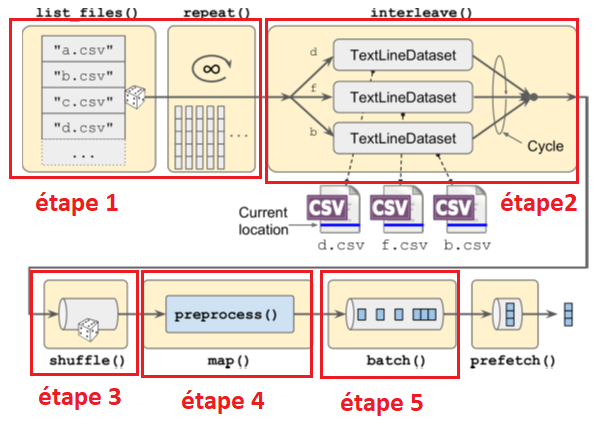

In [ ]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    dataset =                            # étape1 
    dataset =                                      # étape 2
        
        
    dataset =                                     # étape 3
    dataset =                                        # étape 4
    dataset =                                # étape 5
    return dataset.prefetch(1)

In [ ]:
tf.random.set_seed(42)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)



##Utiliser le dataset avec tf.keras

Nous utilisons la fonction `csv_reader_dataset()` pour créer un dataset associé au jeu d’entraînement, un dataset pour les jeux de validation
et un dataset pour les jeux de test :

In [ ]:
train_set = 
valid_set = 
test_set = 

construction et  entraînement d'un modèle Keras avec ces dataset :

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 2s 3ms/step - loss: 1.4679 - val_loss: 21.5124
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.8735 - val_loss: 0.6648
Epoch 3/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6317 - val_loss: 0.6196
Epoch 4/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5933 - val_loss: 0.5669
Epoch 5/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5629 - val_loss: 0.5402
Epoch 6/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5693 - val_loss: 0.5209
Epoch 7/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5231 - val_loss: 0.6130
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5074 - val_loss: 0.4818
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.4963 - val_loss: 0.4904
Epoch 10/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5023 - val_loss: 0.458

In [ ]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 0s 2ms/step - loss: 0.4788


0.4787752628326416